In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [49]:
def backtracking(f, grad_f, x):
    alpha = 1
    c = 0.8
    tau = 0.25
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x)) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-3:
            break
    return alpha

def GD(f, grad_f, x0, tolf, tolx, kmax, back=False, alpha=1e-2):
    k=0
    
    x = np.zeros((len(x0),kmax))
    x[:,k] = x0

    f_val = np.zeros((kmax))
    f_val[k] = f(x0)
    
    err_val = np.zeros(kmax)
    err_val[k] = np.linalg.norm(grad_f(x0))

    grads = np.zeros((len(x0),kmax))
    grads[:,k] = grad_f(x0)

    while ( np.linalg.norm(grad_f(x[:,k])) >= tolf and k < kmax-1):
        if(back):
            alpha = backtracking(f, grad_f, x[:,k])
        step = alpha * grad_f(x[:,k])
        x[:,k+1] = x[:,k] - step
        f_val[k+1] = f(x[:,k+1])
        err_val[k+1] = np.linalg.norm(grad_f(x[:,k+1]))
        grads[:,k+1] = grad_f(x[:,k+1])
        if(np.linalg.norm( x[:,k+1] - x[:,k], 2) < tolx ):#* np.linalg.norm(x[:,k])): 
            break
        k = k+1
    return x[:,:k], k, f_val[:k], grads[:,:k], err_val[:k]

In [31]:
# Plotting functions

def plot_GD(x, k, f_val, grads, err_val, f, error=True, title="Countour plot and gradient descent steps"):
    xv_plot = np.linspace(-10, 10, 100)
    yv_plot = np.linspace(-10, 10, 100)
    xx, yy = np.meshgrid(xv_plot, yv_plot)
    zz_plot = f([xx,yy])
    
    plt.figure(figsize=(15, 6))

    ax1 = plt.subplot(1, 2, 1)
    ax1.plot(x[0,:k],x[1,:k],"--ro")
    ax1.contour(xx, yy, zz_plot)
    plt.title(title)
    ax1.set_xlabel("x1")
    ax1.set_ylabel("x2")
    plt.grid()

    if(error == True):
        x_err_plot = np.linspace(0,k,k)
        ax2 = plt.subplot(1, 2, 2)
        ax2.plot(x_err_plot, err_val)
        plt.title("Error")
        ax2.set_ylabel("error")
        ax2.set_xlabel("iterations")
        plt.grid()

    plt.show()
    print("Iterations: ",k)
    print("solution: ",x[:,-1])

def plot_GD_2D(x, k, f_val, grads, err_val, f, error=True, title="Plot and gradient descent steps"):
    x_plot = np.linspace(-3, 3, 100)
    y_plot = []
    for element in x_plot:
        y_plot.append(f([element]))
    
    plt.figure(figsize=(15, 6))

    ax1 = plt.subplot(1, 2, 1)
    ax1.plot(x_plot,y_plot)
    ax1.plot(x[0,:],f_val,"--ro")
    plt.title(title)
    ax1.set_xlabel("x1")
    ax1.set_ylabel("x2")
    plt.grid()

    if(error == True):
        x_err_plot = np.linspace(0,k,k)
        ax2 = plt.subplot(1, 2, 2)
        ax2.plot(x_err_plot, err_val)
        plt.title("Error")
        ax2.set_ylabel("error")
        ax2.set_xlabel("iterations")
        plt.grid()

    plt.show()
    print("Iterations: ",k)
    print("solution: [",x[0,-1],f_val[-1],"]")

def plot_error(k, err_val, title="Plot of the error"):
    plt.figure(figsize=(3, 3))
    x_err_plot = np.linspace(0,k,k)
    plt.plot(x_err_plot, err_val)
    plt.title("Error")
    plt.ylabel("error")
    plt.xlabel("iterations")
    plt.grid()
    plt.show()



In [32]:
# Functions definition
lamb = 0.5

def f1(x):                      # Has true optimum in (3,1).T 
    return (x[0]-3)**2 + (x[1]-1)**2

def grad_f1(x):
    return np.array((2*(x[0] - 3) , 2*(x[1] - 1)))

def f2(x):                      # Has true optimum in (1,2).T 
    return 10*(x[0]-1)**2 + (x[1]-2)**2

def grad_f2(x):
    return np.array((20*x[0] - 20 , 2*x[1] - 4))

def f3(x):  
    n = len(x)     
    v = np.linspace(0,1,n)
    A = np.vander(v)  
    x_true = np.ones(n).T    
    b = A @ x_true         
    return (np.linalg.norm((A@x) - b,2)**2) / 2

def grad_f3(x):
    n = len(x)     
    v = np.linspace(0,1,n)
    A = np.vander(v)   
    x_true = np.ones(n).T    
    b = A @ x_true   
    return A.T@(A@x-b)

def f4(x):
    n = len(x)     
    v = np.linspace(0,1,n)
    A = np.vander(v)
    x_true = np.ones(n).T    
    b = A @ x_true         
    return (np.linalg.norm((A@x) - b,2)**2) + lamb/2 * (np.linalg.norm(x,2)**2) / 2

def grad_f4(x):
    return grad_f3(x) + lamb*np.array(x)

def f5(x):
    return x[0]**4 + x[0]**3 - 2*(x[0]**2) - 2*x[0]

def grad_f5(x):
    return 4*(x[0]**3) + 3* (x[0]**2) - 4*x[0] - 2

## Optimization via Gradient Descent

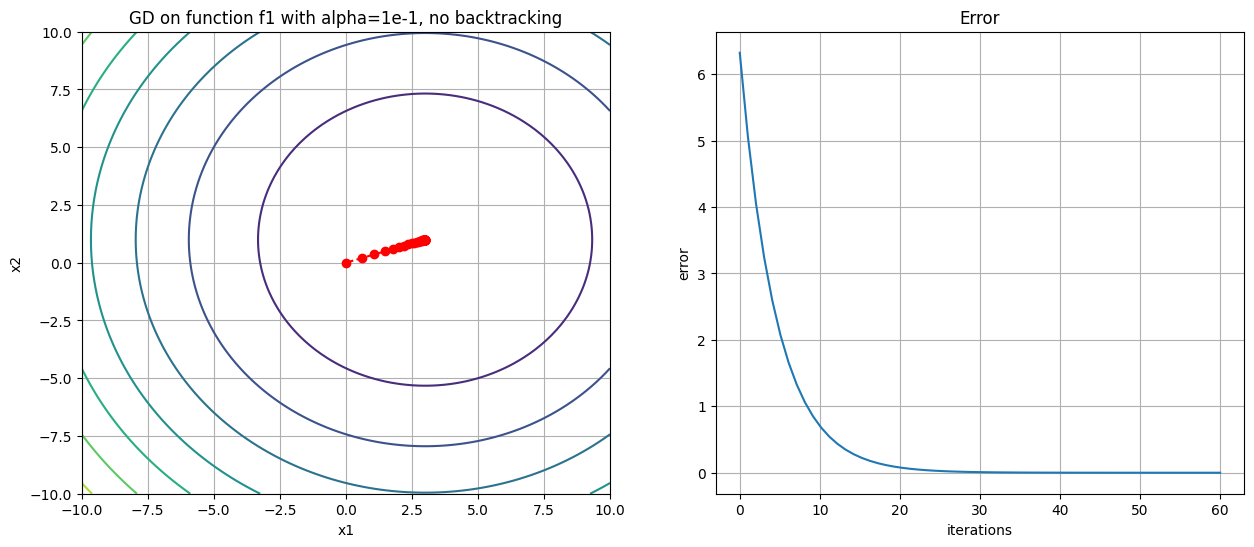

Iterations:  60
solution:  [2.99999425 0.99999808]


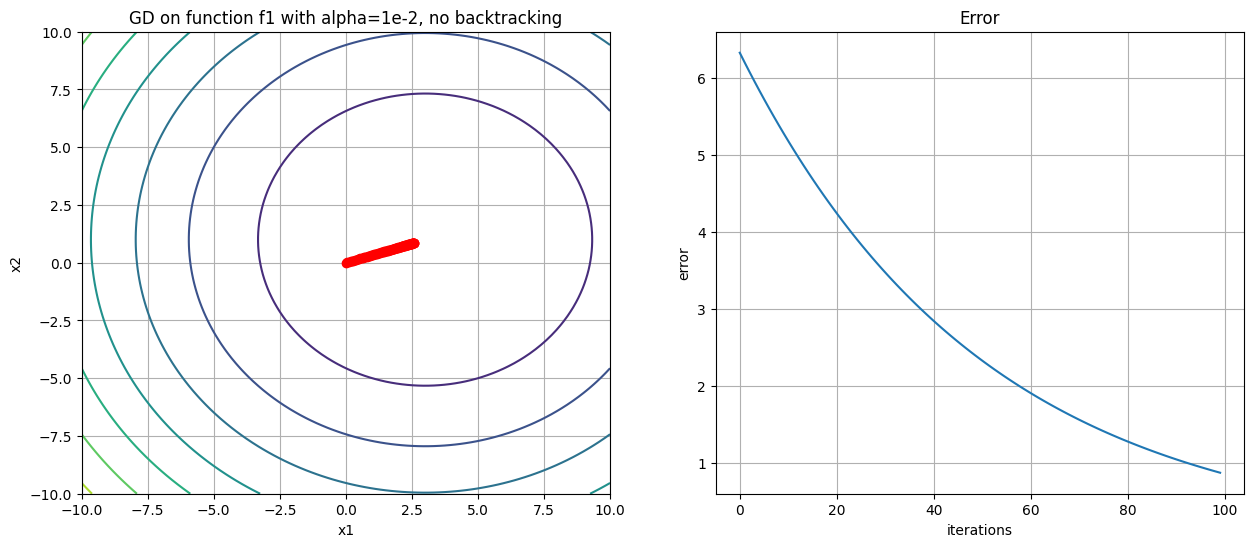

Iterations:  99
solution:  [2.5857365  0.86191217]


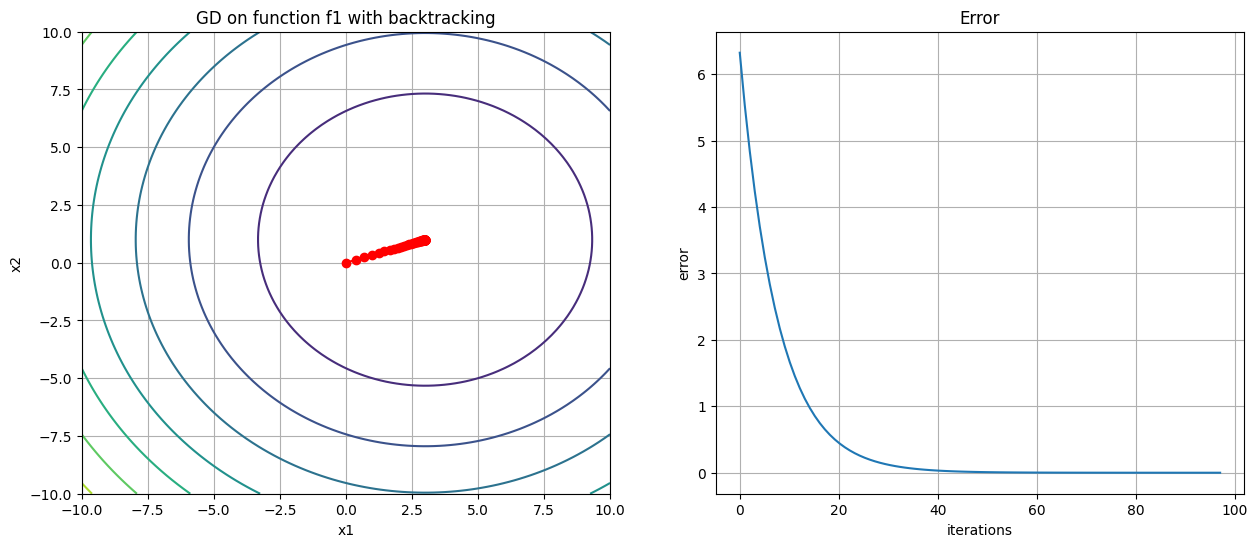

Iterations:  97
solution:  [2.99999187 0.99999729]


In [33]:
# GD on function f1
x0 = [0,0]
tolf = 1e-6
tolx = 1e-6
maxk = 100

x, k, f_val, grads, err_val = GD(f1, grad_f1, x0, tolf, tolx, maxk, back=False, alpha=1e-1)
plot_GD(x, k, f_val, grads, err_val, f1, title="GD on function f1 with alpha=1e-1, no backtracking")

x, k, f_val, grads, err_val = GD(f1, grad_f1, x0, tolf, tolx, maxk, back=False, alpha=1e-2)
plot_GD(x, k, f_val, grads, err_val, f1, title="GD on function f1 with alpha=1e-2, no backtracking")

x0 = [0,0]
tolf = 1e-6
tolx = 1e-6
maxk = 100
x, k, f_val, grads, err_val = GD(f1, grad_f1, x0, tolf, tolx, maxk, back=True)
plot_GD(x, k, f_val, grads, err_val, f1, title="GD on function f1 with backtracking")


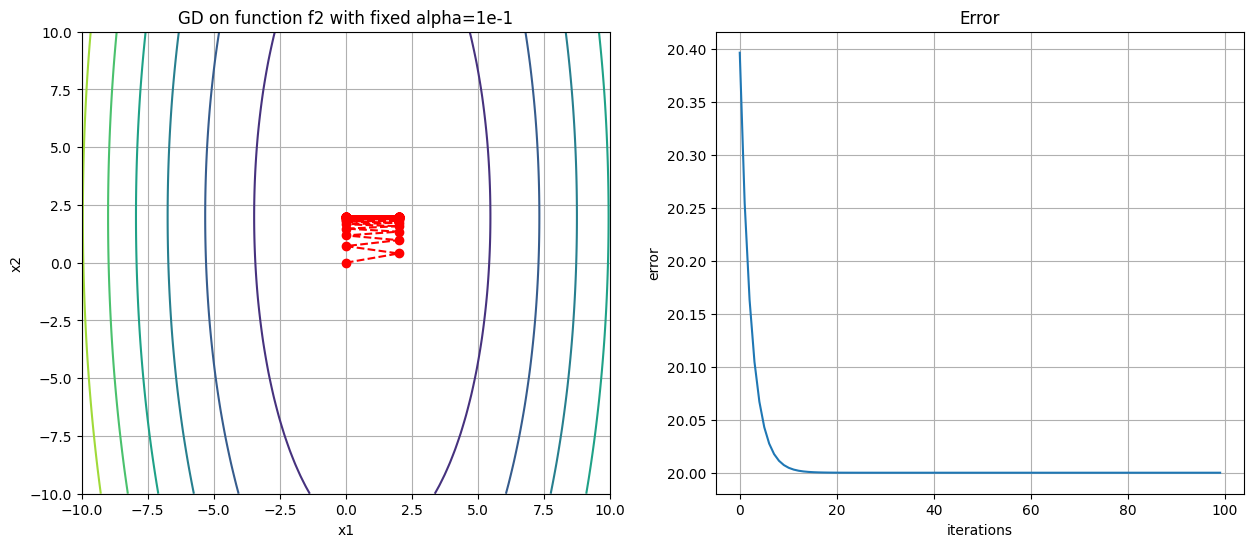

Iterations:  99
solution:  [0. 2.]


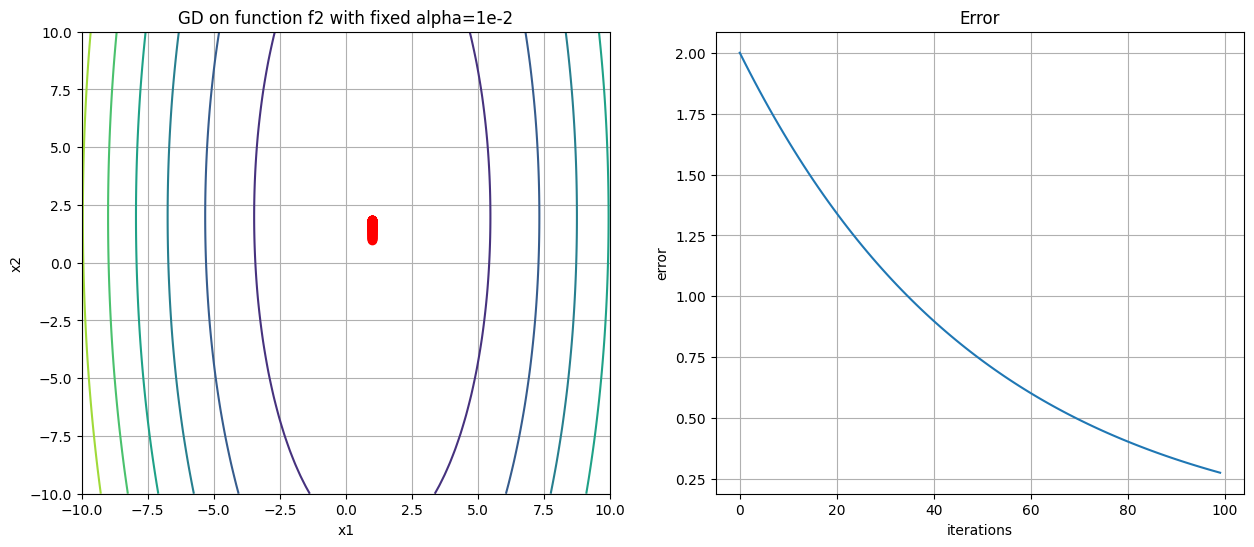

Iterations:  99
solution:  [1.         1.86191217]


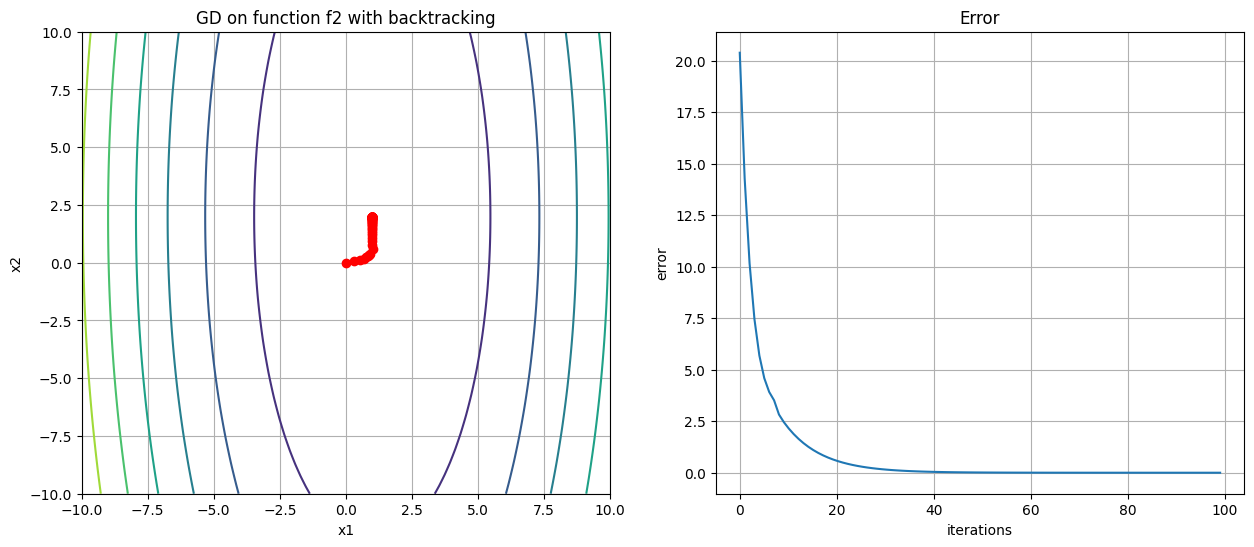

Iterations:  99
solution:  [1.         1.99999154]


In [34]:
# GD on function f2
x0 = [0,0]
tolf = 1e-6
tolx = 1e-6
maxk = 100

x, k, f_val, grads, err_val = GD(f2, grad_f2, x0, tolf, tolx, maxk, back=False, alpha=1e-1)
plot_GD(x, k, f_val, grads, err_val, f2, title="GD on function f2 with fixed alpha=1e-1")

x0 = [1,1]
tolf = 1e-6
tolx = 1e-6
maxk = 100

x, k, f_val, grads, err_val = GD(f2, grad_f2, x0, tolf, tolx, maxk, back=False, alpha=1e-2)
plot_GD(x, k, f_val, grads, err_val, f2, title="GD on function f2 with fixed alpha=1e-2")

x0 = [0,0]
tolf = 1e-6
tolx = 1e-6
maxk = 100
x, k, f_val, grads, err_val = GD(f2, grad_f2, x0, tolf, tolx, maxk, back=True)
plot_GD(x, k, f_val, grads, err_val, f2, title="GD on function f2 with backtracking")

Error starts at:  3.605551275463989 and after  99 iterations is:  0.28093792256837624  (fixed alpha)
Solution found: [ 0.7562935753860722 1.0304244143056203 ]


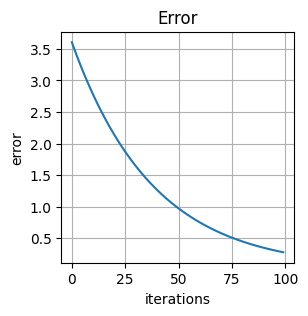

Error starts at:  3.605551275463989 and after  58 iterations is:  4.916004589801511e-06  (with backtracking)
Solution found: [ 0.9999890145813346 1.0000066702657247 ]


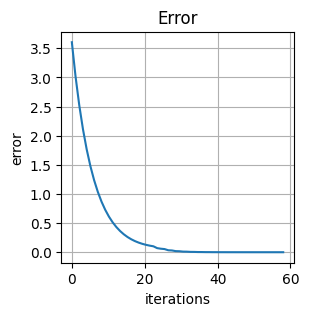

Error starts at:  12.89742164068603 and after  99 iterations is:  0.21741516530660557  (fixed alpha)
Solution found: [ [0.85093673 0.90355837 0.9913418  1.1254883 ] ]


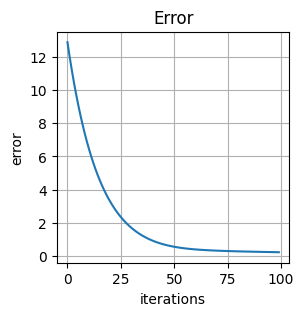

Error starts at:  12.89742164068603 and after  99 iterations is:  0.0015290575673644528  (with backtracking)
Solution found: [ [0.98599503 1.00119739 1.01395956 0.99698661] ]


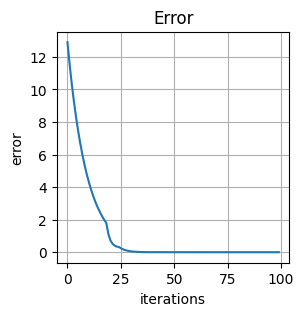

In [51]:
# GD on function f3

x0 = [0,0]
tolf = 1e-6
tolx = 1e-6
maxk = 100

x, k, f_val, grads, err_val = GD(f3, grad_f3, x0, tolf, tolx, maxk, back=False, alpha=1e-2)
print("Error starts at: ", err_val[0], "and after ", k, "iterations is: ",err_val[-1], " (fixed alpha)")
print("Solution found: [",x[0,-1],x[1,-1],"]")
plot_error(k, err_val)

x, k, f_val, grads, err_val = GD(f3, grad_f3, x0, tolf, tolx, maxk, back=True, alpha=1e-1)
print("Error starts at: ", err_val[0], "and after ", k, "iterations is: ",err_val[-1], " (with backtracking)")
print("Solution found: [",x[0,-1],x[1,-1],"]")
plot_error(k, err_val)


# n = 3
x0 = [0,0,0,0]
tolf = 1e-6
tolx = 1e-6
maxk = 100

x, k, f_val, grads, err_val = GD(f3, grad_f3, x0, tolf, tolx, maxk, back=False, alpha=1e-2)
print("Error starts at: ", err_val[0], "and after ", k, "iterations is: ",err_val[-1], " (fixed alpha)")
print("Solution found: [",x[:,-1],"]")
plot_error(k, err_val)

x, k, f_val, grads, err_val = GD(f3, grad_f3, x0, tolf, tolx, maxk, back=True, alpha=1e-1)
print("Error starts at: ", err_val[0], "and after ", k, "iterations is: ",err_val[-1], " (with backtracking)")
print("Solution found: [",x[:,-1],"]")
plot_error(k, err_val)

For lambda equal to  0.1
Error starts at:  12.89742164068603 and after  99 iterations is:  0.0009325753892096282  (fixed alpha)
Error starts at:  12.89742164068603 and after  99 iterations is:  0.12530704809387772  (with backtracking)
For lambda equal to  0.3
Error starts at:  12.89742164068603 and after  99 iterations is:  0.00012478498144765756  (fixed alpha)
Error starts at:  12.89742164068603 and after  99 iterations is:  0.38362496847514865  (with backtracking)
For lambda equal to  0.6
Error starts at:  12.89742164068603 and after  90 iterations is:  1.0377739239709762e-05  (fixed alpha)
Error starts at:  12.89742164068603 and after  99 iterations is:  0.7555694070580551  (with backtracking)
For lambda equal to  1
Error starts at:  12.89742164068603 and after  55 iterations is:  1.0736190539354855e-05  (fixed alpha)


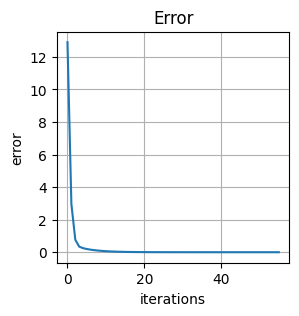

Error starts at:  12.89742164068603 and after  99 iterations is:  1.23786491389989  (with backtracking)


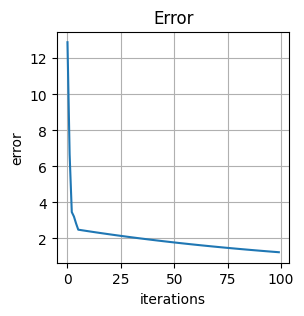

In [52]:
# GD on function f4

x0 = [0,0,0,0]
tolf = 1e-6
tolx = 1e-6
maxk = 100

lamb = 0.1
print("For lambda equal to ", lamb)
x, k, f_val, grads, err_val = GD(f4, grad_f4, x0, tolf, tolx, maxk, back=False, alpha=1e-1)
print("Error starts at: ", err_val[0], "and after ", k, "iterations is: ",err_val[-1], " (fixed alpha)")
x, k, f_val, grads, err_val = GD(f4, grad_f4, x0, tolf, tolx, maxk, back=True, alpha=1e-1)
print("Error starts at: ", err_val[0], "and after ", k, "iterations is: ",err_val[-1], " (with backtracking)")
lamb = 0.3
print("For lambda equal to ", lamb)
x, k, f_val, grads, err_val = GD(f4, grad_f4, x0, tolf, tolx, maxk, back=False, alpha=1e-1)
print("Error starts at: ", err_val[0], "and after ", k, "iterations is: ",err_val[-1], " (fixed alpha)")
x, k, f_val, grads, err_val = GD(f4, grad_f4, x0, tolf, tolx, maxk, back=True, alpha=1e-1)
print("Error starts at: ", err_val[0], "and after ", k, "iterations is: ",err_val[-1], " (with backtracking)")
lamb = 0.6
print("For lambda equal to ", lamb)
x, k, f_val, grads, err_val = GD(f4, grad_f4, x0, tolf, tolx, maxk, back=False, alpha=1e-1)
print("Error starts at: ", err_val[0], "and after ", k, "iterations is: ",err_val[-1], " (fixed alpha)")
x, k, f_val, grads, err_val = GD(f4, grad_f4, x0, tolf, tolx, maxk, back=True, alpha=1e-1)
print("Error starts at: ", err_val[0], "and after ", k, "iterations is: ",err_val[-1], " (with backtracking)")
lamb = 1
print("For lambda equal to ", lamb)
x, k, f_val, grads, err_val = GD(f4, grad_f4, x0, tolf, tolx, maxk, back=False, alpha=1e-1)
print("Error starts at: ", err_val[0], "and after ", k, "iterations is: ",err_val[-1], " (fixed alpha)")
plot_error(k, err_val)
x, k, f_val, grads, err_val = GD(f4, grad_f4, x0, tolf, tolx, maxk, back=True, alpha=1e-1)
print("Error starts at: ", err_val[0], "and after ", k, "iterations is: ",err_val[-1], " (with backtracking)")
plot_error(k, err_val)

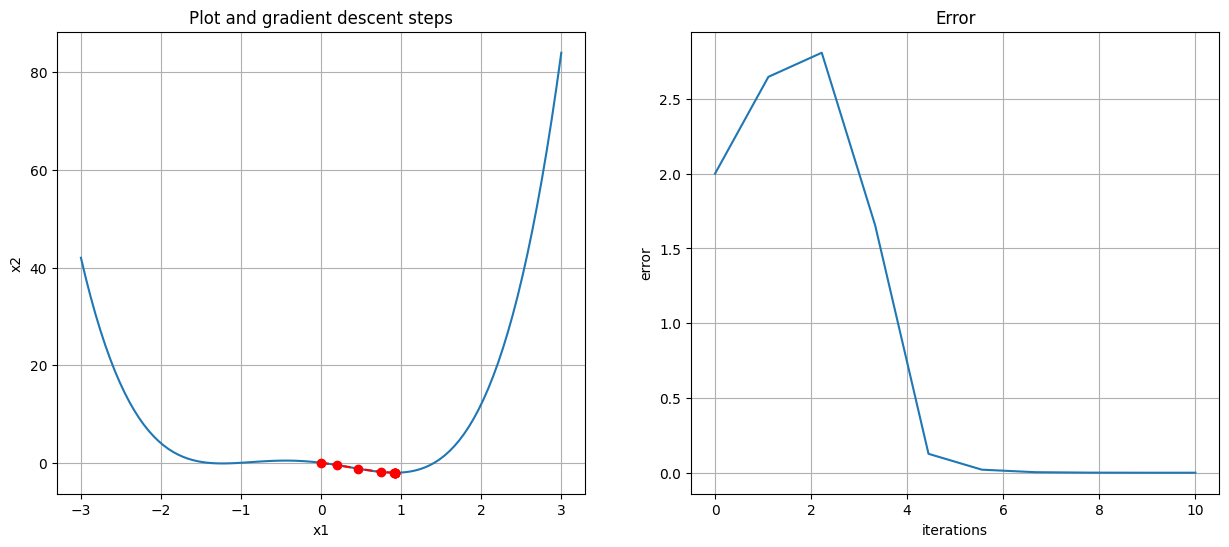

Iterations:  10
solution: [ 0.9222263966908124 -2.037748041480788 ]


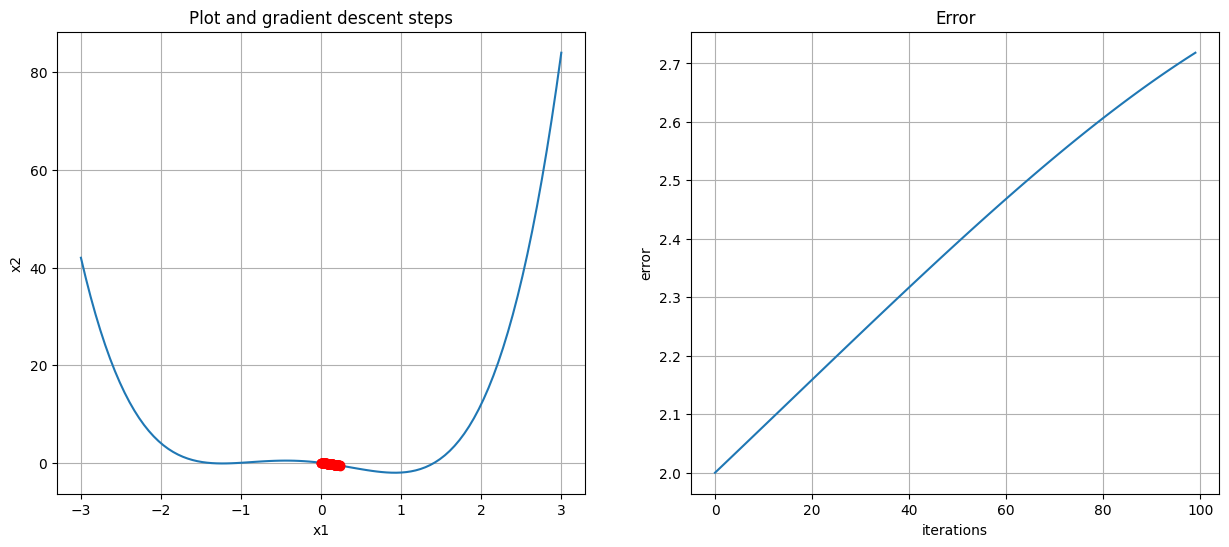

Iterations:  99
solution: [ 0.23288574445756777 -0.5586707724477841 ]


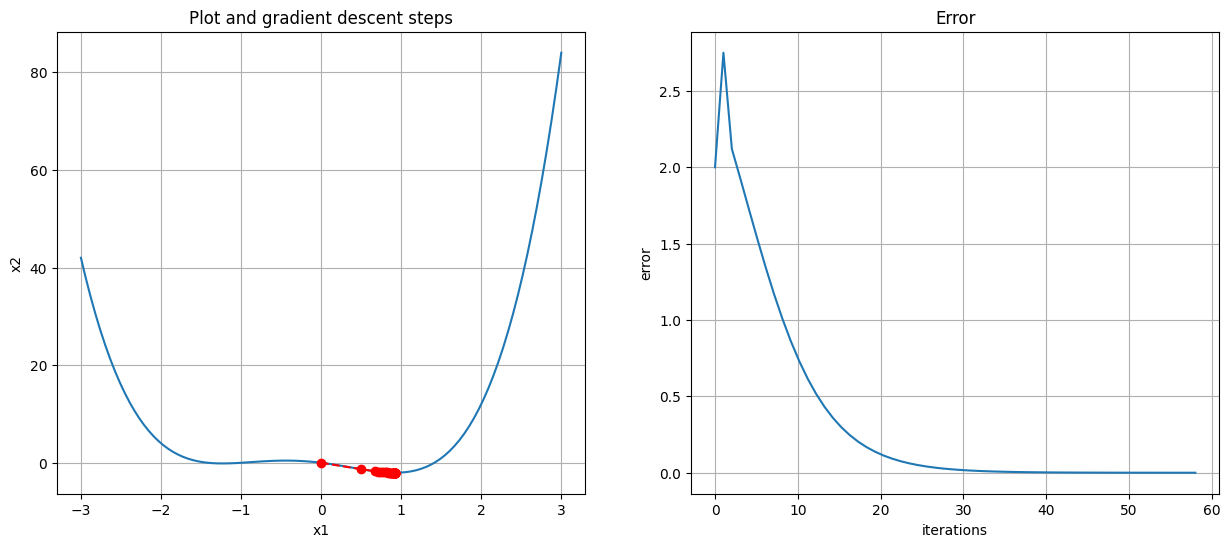

Iterations:  58
solution: [ 0.922219325656556 -2.0377480413204347 ]


In [53]:
x0 = [0]
tolf = 1e-6
tolx = 1e-6
maxk = 100
x, k, f_val, grads, err_val = GD(f5, grad_f5, x0, tolf, tolx, maxk, back=False, alpha=1e-1)
plot_GD_2D(x, k, f_val, grads, err_val, f5)


x, k, f_val, grads, err_val = GD(f5, grad_f5, x0, tolf, tolx, maxk, back=False, alpha=1e-3)
plot_GD_2D(x, k, f_val, grads, err_val, f5)

x0 = [0]
tolf = 1e-6
tolx = 1e-6
maxk = 100
x, k, f_val, grads, err_val = GD(f5, grad_f5, x0, tolf, tolx, maxk, back=True)
plot_GD_2D(x, k, f_val, grads, err_val, f5)

## Optimization via Stochastic Gradient Descent

In [38]:
import pandas as pd

In [39]:
data = pd.read_csv('./data.csv')

data = np.array(data)   

X0 = data[:, 1:].T
Y0 = data[:, 0]

def choose_labels(labels):
    idx = [index for index, elem in enumerate(Y0) if elem in labels]

    X = X0[:, idx]     
    Y = Y0[idx]

    return X, Y

def split_data(X, Y, Ntrain):

    d, N = X.shape

    idx = np.arange(N)
    np.random.shuffle(idx)

    train_idx = idx[:Ntrain]
    test_idx = idx[Ntrain:]

    Xtrain = X[:, train_idx]
    Ytrain = Y[train_idx]
    
    Xtest = X[:, test_idx]
    Ytest = Y[test_idx]

    return (Xtrain, Ytrain), (Xtest, Ytest)

chosen_digits = [3, 6]

X, Y = choose_labels(chosen_digits)

Y[Y == chosen_digits[0]] = 0
Y[Y == chosen_digits[1]] = 1

Ntrain = int(0.6 * Y.shape[0])
(Xtrain, Ytrain), (Xtest, Ytest) = split_data(X, Y, Ntrain)


In [40]:
# Stochastic Gradient descent

def l(w, x_hat, y):
    z = fw(x_hat, w)
    _, N = x_hat.shape
    y = np.reshape(y, (N,1))
    return (np.sum(MSE(z, y))/N)

def fw(xhat, w):
    return sigmoid(xhat.T @ w)

def sigmoid(z):
    return 1./(1 + np.exp(-z))

def MSE(y, y1):
    return ((np.linalg.norm(y - y1))**2)    

# Value of the gradient 
def grad_l(w, X_hat, Y):
    _, N = X_hat.shape
    sum = 0
    for i in range(N):
        z = fw(w, X_hat[:, i]) 
        sum += z * (1-z) * X_hat[:,i].T * (z-Y[i])
    return sum/N

def shuffle_data(X, Y, size):
    _, N = X.shape
    indexes = np.arange(N)
    np.random.shuffle(indexes)

    X_shuffle = X[:, indexes]
    Y_shuffle = Y[indexes]

    return X_shuffle, Y_shuffle

def SGD(l, grad_l, w0, D, batch_size, n_epochs, alpha=1e-5):
    X, Y = D  #Split D into X and Y
    d, N = X.shape
    X = np.concatenate((np.ones((1,N)), X))
    d, N = X.shape

    n_batch_per_epoch = N//batch_size
    tot_batch = n_batch_per_epoch * n_epochs
    
    w = np.array(w0)
    f_val = np.zeros((n_epochs, ))
    grads = np.zeros((n_epochs, d))
    err = np.zeros((n_epochs,))
    w_vector = np.zeros((tot_batch, len(w0)))
    
    #For each epoch    
    for epoch in range(n_epochs):
        X_shuffle, Y_shuffle = shuffle_data(X, Y, N//batch_size)
        
        for b in range (n_batch_per_epoch):  
            n = b*batch_size
            m = (b+1)*batch_size
            Mx = X_shuffle[:, n:m]
            My = Y_shuffle[n:m]

            w = w - alpha * grad_l(w, Mx, My)
            w_vector[epoch*n_batch_per_epoch + b, :] = w
            
        f_val[epoch] = l(w, X_shuffle, Y_shuffle)
        grads[epoch, :] = grad_l(w, X_shuffle, Y_shuffle)
        err[epoch] = np.linalg.norm(grad_l(w, X_shuffle, Y_shuffle))

    return w_vector, f_val, grads, err

In [41]:
d, N = Xtrain.shape
D = (Xtrain, Ytrain)

mean=0
sigma=1e-3
w0 = np.random.normal(mean, sigma, d+1)
batch_size = 15
n_epochs = 50

w, f_val, grads, err = SGD(l, grad_l, w0, D, batch_size, n_epochs, alpha=1e-5)

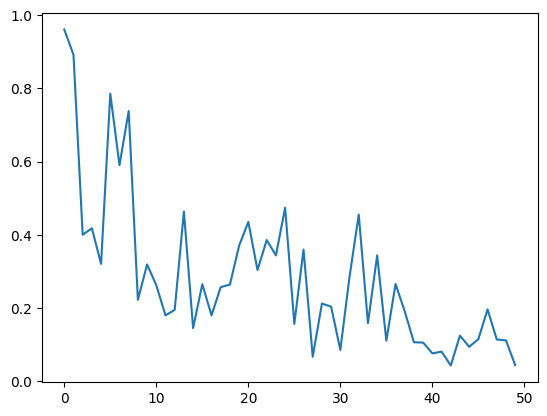

In [42]:
x_plot = np.arange(0,n_epochs)
plt.plot(x_plot,err)
#print(err)


## Logistic regression

In [43]:
def accuracy(pred, label):
    N, = pred.shape
    correct = [pred == label]
    correct_sum = int(np.sum(correct))
    return correct_sum, correct_sum/N

def predict(w, X, treshold=0.5):
    z = fw(w, X)
    _, N = X.shape
    predictions = np.zeros((N,))
    predictions = z>treshold
    return predictions

d, N = Xtrain.shape
Xtrain_hat =  np.concatenate((np.ones((1,N)), Xtrain), axis=0)
ap = predict(w[-1], Xtrain_hat)
tot, accur = accuracy(ap, Ytrain)

print("Equals to 1 in train: ", np.sum(ap))
print("Total tests in train: ", N)
print("Total matches in train: ", tot)
print("Accuracy in train: ", accur*100)

print() 

d, N_test = Xtest.shape
Xtest_hat =  np.concatenate((np.ones((1,N_test)), Xtest), axis=0)
ap = predict(w[-1], Xtest_hat)
tot, accur = accuracy(ap, Ytest)

print("Equals to 1: ", np.sum(ap))
print("Total tests: ", N_test)
print("Total matches: ", tot)
print("Accuracy: ", accur*100)
    

Equals to 1 in train:  2510
Total tests in train:  5092
Total matches in train:  5088
Accuracy in train:  99.92144540455617

Equals to 1:  1634
Total tests:  3396
Total matches:  3385
Accuracy:  99.6760895170789


## Comparison with GD

In [44]:
def GD_2(l, grad_l, w0, D, tolf = 1e-9, tolx= 1e-9, kmax = 50, alpha = 1e-1):
    X, Y = D
    d, N = X.shape

    Xhat = np.concatenate((np.ones((1,N)), X), axis=0)
    
    w_vals = [w0]
    f_vals = [l(w0, Xhat, Y)]
    grad_f_vals = [grad_l(w0, Xhat, Y)]
    err_vals = [np.linalg.norm(grad_l(w0, Xhat, Y))]

    iterations = 0

    while iterations < kmax:
        w = w_vals[-1] - alpha * grad_l(w_vals[-1], Xhat, Y)

        w_vals.append(w)
        f_vals.append(l(w, Xhat, Y))
        grad_f_vals.append(grad_l(w, Xhat, Y))
        err_vals.append(np.linalg.norm(grad_l(w, Xhat, Y)))

        iterations+=1

        if err_vals[-1] < tolf * err_vals[0]:
            break

        if np.linalg.norm(w_vals[-1] - w_vals[-2]) < tolx * np.linalg.norm(w_vals[0]):
            break

    return (w, f_vals, grad_f_vals, err_vals, iterations)

In [45]:
w_gd, f_vals_gd, grad_vals_gd, err_vals_gd, iterations_gd = GD_2(l, grad_l, w0, D)

/tmp/ipykernel_8233/4054044376.py:13: RuntimeWarning: overflow encountered in exp
  return 1./(1 + np.exp(-z))


In [56]:
print(w_gd)
print(w)

[-1.65627546e-04 -1.15836762e-03  9.84714172e-04  6.95317990e-04
 -6.24080246e-04 -6.91425901e-04  6.28822683e-04 -1.22195194e-03
  1.09192601e-03 -4.72737954e-04 -1.20803772e-03  1.40276152e-04
 -1.08852014e-03  1.70367870e-04  1.18855799e-03 -4.95578872e-04
 -5.95737726e-04  4.18945211e-04 -5.15580563e-04  4.95604489e-04
  5.29574843e-04  5.85439121e-04  2.66561589e-04  4.76399895e-04
  1.86189202e-03  4.28239784e-04  3.51192704e-04  4.18827484e-04
 -1.00693610e-05 -1.25003960e-03  3.76931815e-04 -1.12127554e-03
  2.63431201e-03 -6.03512337e-04 -8.03940074e-04  2.44823718e-03
  1.09204160e-03  1.14426675e-03  1.97154889e-03  3.82260399e-03
  5.29932998e-03  5.82059575e-03  5.16745414e-03  4.40526561e-03
  1.91272389e-03 -1.99036077e-04  8.83338883e-04  1.71704114e-04
  2.88102178e-03  1.30675642e-03  3.09594314e-03  3.85050858e-05
 -5.19113556e-04  1.20434565e-03  7.22140407e-04  7.36618020e-04
  1.10496540e-03  7.52639080e-04 -1.57786900e-04  9.37768105e-04
  2.32041866e-03 -2.01724

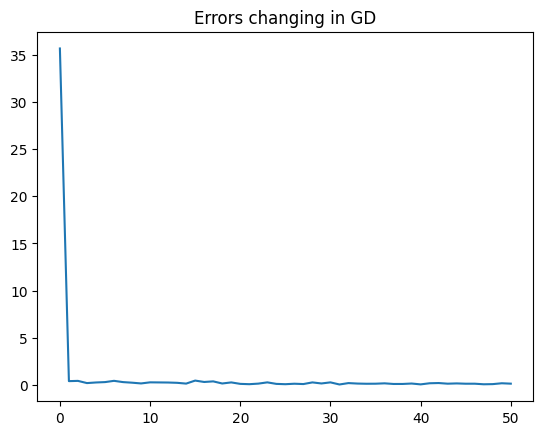

In [46]:
x_plot = np.arange(len(err_vals_gd))
plt.plot(x_plot, err_vals_gd)
plt.title("Errors changing in GD")
plt.show()

In [47]:
Xt = Xtrain.copy()
Yt = Ytrain.copy()

d, N = Xt.shape
Xthat = np.concatenate((np.ones((1,N)), Xt), axis=0)
app = predict(w_gd, Xthat)
tot, avg = accuracy(app, Yt)
print("Matches on Train Set:", int(tot))
print("Total entries on Train Set:", int(Yt.shape[0]))
print("Accuracy on Train Set:", round(avg*100, 2))

Xt = Xtest.copy()
Yt = Ytest.copy()

d, N = Xt.shape
Xthat = np.concatenate((np.ones((1,N)), Xt), axis=0)
app = predict(w_gd, Xthat)
tot, avg = accuracy(app, Yt)
print("Matches on Test Set:", int(tot))
print("Total entries on Test Set:", int(Yt.shape[0]))
print("Accuracy on Test Set:", round(avg*100, 2))

Matches on Train Set: 4719
Total entries on Train Set: 5092
Accuracy on Train Set: 92.67
Matches on Test Set: 3158
Total entries on Test Set: 3396
Accuracy on Test Set: 92.99


/tmp/ipykernel_8233/4054044376.py:13: RuntimeWarning: overflow encountered in exp
  return 1./(1 + np.exp(-z))
